## Prism
Two prism surfaces are defined to illustrate dispersion. These surface are of circular aperture. Sources wavelengths are changes for the second system definition. Spot diagram illustrates dispersion.

In [1]:
# %matplotlib inline
# %matplotlib tk
# %matplotlib qt5
import numpy as np
import sys
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random as rd
import copy as cp
from datetime import datetime as dt
#
import PyAstroPol as pap
pap.roundOffDisplay(5)

In [2]:
Source_analysis = pap.Source(10000, Clear=40)                   # Source for ray analysis
Source_analysis.rotateAboutX(-30)
Source_analysis.translateOrigin(y=-60, z=-100)                  # Adjust source position
#
Source_display = pap.Source(20, Clear=40)                       # Source for ray display
Source_display.rotateAboutX(-30)
Source_display.translateOrigin(y=-60, z=-100)                   # Adjust source (display) position
#
FrontSurf = pap.Surface(100, n1=1.0, n2='N-BK7')                # Front surface of the prism
FrontSurf.rotateAboutX(30)                                      
BackSurf = pap.Surface(100, n1='N-BK7', n2=1.0)                 # Back surface of the prism
BackSurf.rotateAboutX(-30)
BackSurf.translateOrigin(z=50)
#
Detector_1 = pap.Detector(200)                                  # Detector
Detector_1.rotateAboutX(45)
Detector_1.translateOrigin(y=-50, z=200)                        # Adjust detector position

In [3]:
Sys = pap.System(Source_analysis, [FrontSurf, BackSurf], 
             Detector_1, dRays=Source_display)                  # Complete optical system
Sys.propagateRays()                                             # Propagate rays through system

In [4]:
Source_analysis.Wavelength = 0.200                              # Change the wavelength
Source_display.Wavelength = 0.200                               # Change the wavelength
Sys2 = pap.System(Source_analysis, [FrontSurf, BackSurf], 
             Detector_1, dRays=Source_display)                  # Complete optical system
Sys2.propagateRays()                                            # Propagate rays through system

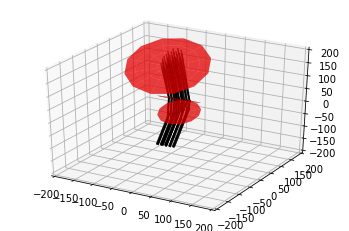

In [5]:
Fig = plt.figure()                                             
Ax = Fig.add_subplot(111, projection='3d')
Sys.draw(Ax)                                                    # Draw optical system
Sys2.draw(Ax)
pap.adjustAspect(Ax, 400)                                           # Adjust 3D space
plt.show()

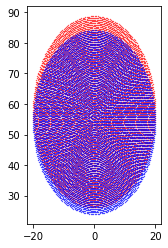

In [6]:
Fig = plt.figure()
Ax = Fig.add_subplot(111, aspect='equal')                       
Sys.drawSpotDiagram(Ax, s=0.1, color='r')                       # Draw spot diagram
Sys2.drawSpotDiagram(Ax, s=0.1, color='b')                      # Draw off-axis field spot
plt.show()

In [7]:
MM, Tra = Sys.getSystemMuellerMatrix()                          # Optical system's Mueller matrix
print('System Mueller matrix is : \n', MM)
print('Transmission coefficient is: ', Tra)

System Mueller matrix is : 
 [[ 1.00000 -0.43110  0.00000 -0.00000]
 [-0.43110  1.00000 -0.00000 -0.00000]
 [ 0.00000 -0.00000  0.90231 -0.00000]
 [ 0.00000  0.00000  0.00000  0.90231]]
Transmission coefficient is:  0.953237134814519
